In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json file here
# first of all from runtime change cpu to gpu



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usamajaved1","key":"1d1199e2374b68accd90424ce5110473"}'}

In [2]:
!pip install kaggle



In [3]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:07<00:00, 23.2MB/s]
100% 2.70G/2.70G [02:07<00:00, 22.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/new-plant-diseases-dataset.zip","r")
zip_ref.extractall("/content")
zip_ref.close()


In [5]:
## importing libraries

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [7]:
## Data preprocessing

In [8]:
# https://keras.io/api/data_loading/image/ check this to understand code more precisely
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",# selected according to the situation
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128), # decide according to your requirement
    shuffle=True, # randomly learn from the images
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [9]:
### validation image preprocessing

In [10]:
# https://keras.io/api/data_loading/image/ check this to understand code more precisely
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",# selected according to the situation
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128), # decide according to your requirement
    shuffle=True, # randomly learn from the images
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [12]:
# 128*128 is img size and 3 is rgb mean these are colourfull images

# things to avoid overshooting
1. choose small learning rate
2.There maybe a chance of overfittig
3. add more convolutional layer  

In [13]:
## Building Model

In [14]:
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential


In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = [128,128,3],padding='same'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Dropout(0.25))

In [22]:

model.add(Flatten())

In [23]:
# output layer

In [24]:
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=38,activation='softmax'))

In [25]:
# compile model

In [26]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Trainning Model

In [29]:
history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 65ms/step - accuracy: 0.3487 - loss: 0.0948 - val_accuracy: 0.8329 - val_loss: 0.0257
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 58ms/step - accuracy: 0.8444 - loss: 0.0250 - val_accuracy: 0.9136 - val_loss: 0.0140
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.9171 - loss: 0.0141 - val_accuracy: 0.9273 - val_loss: 0.0118
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9478 - loss: 0.0091 - val_accuracy: 0.9500 - val_loss: 0.0082
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.9638 - loss: 0.0065 - val_accuracy: 0.9577 - val_loss: 0.0074
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 150s 62ms/step - accuracy: 0.9724 - loss: 0.0050 - val_accuracy: 0.9548 - val_loss: 0.0079
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.9786 - loss: 0.0040 - val_accuracy: 0.9693 - val_loss: 0.0056
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 

Model Evaluation

In [33]:
# model evaluation on trainning set  and validadtion test


In [31]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - accuracy: 0.9881 - loss: 0.0026


In [32]:
test_loss,test_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9672 - loss: 0.0063


Saving Model

In [34]:
model.save('trained_model.keras')

In [35]:
history.history

{'accuracy': [0.5712782144546509,
  0.869179904460907,
  0.9255850315093994,
  0.9518030881881714,
  0.9665125608444214,
  0.974066436290741,
  0.980297327041626,
  0.9842520952224731,
  0.9871114492416382,
  0.9885767102241516],
 'loss': [0.06115872040390968,
  0.021275440230965614,
  0.012623329646885395,
  0.008411095477640629,
  0.006034530699253082,
  0.0046970113180577755,
  0.00372857553884387,
  0.0030591594986617565,
  0.002508457750082016,
  0.0022662871051579714],
 'val_accuracy': [0.8328590989112854,
  0.9135556817054749,
  0.9272706508636475,
  0.9499772191047668,
  0.957659900188446,
  0.9548144936561584,
  0.9692692756652832,
  0.9751309156417847,
  0.9700660109519958,
  0.9659116864204407],
 'val_loss': [0.025668779388070107,
  0.014034428633749485,
  0.011801132932305336,
  0.00824698619544506,
  0.007439574226737022,
  0.00791762862354517,
  0.005558676086366177,
  0.004471999127417803,
  0.005508685950189829,
  0.006674803327769041]}

recording model history in json

In [38]:
import json
with open('training_hist.json','w') as f :
    json.dump(history.history,f)

Accuracy Visualizations

In [41]:
epochs = [i for i in range(1,11)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

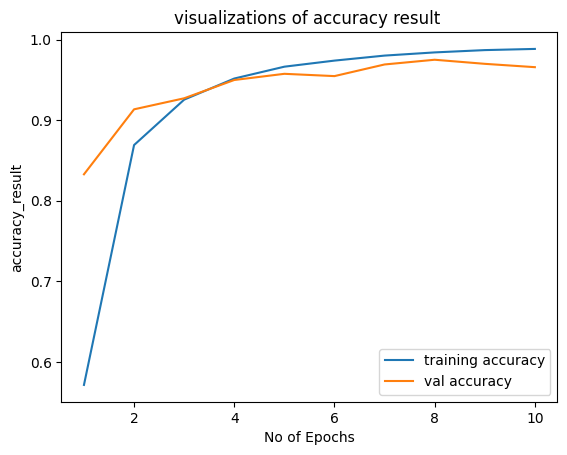

In [49]:
plt.plot(epochs,history.history['accuracy'],label = 'training accuracy')
plt.plot(epochs,history.history['val_accuracy'],label = 'val accuracy')
plt.title('visualizations of accuracy result ')
plt.xlabel('No of Epochs')
plt.ylabel("accuracy_result")
plt.legend()
plt.show()

In [50]:
class_name = validation_set.class_names

In [51]:
class_name # all our 38 classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:
# https://keras.io/api/data_loading/image/ check this to understand code more precisely
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",# selected according to the situation
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128), # decide according to your requirement
    shuffle=False, # bcz we want it to select images in sequence noe
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step


In [58]:
# it will do prediction on all the 550 batches 550*32 = 17572

In [59]:
y_pred

array([[1.0000000e+00, 3.3113062e-21, 1.8472181e-17, ..., 2.9789150e-25,
        1.9366025e-21, 8.2124608e-21],
       [1.0000000e+00, 7.6527767e-15, 4.4184918e-14, ..., 7.2549194e-19,
        5.1280748e-17, 5.1682774e-16],
       [1.0000000e+00, 8.8530199e-24, 3.0821705e-21, ..., 7.0972160e-28,
        3.6465462e-24, 1.0442839e-22],
       ...,
       [8.3471168e-18, 1.4158438e-21, 4.4431088e-18, ..., 8.5078770e-20,
        1.9792936e-21, 1.0000000e+00],
       [5.6619820e-19, 5.7430664e-23, 1.0338965e-19, ..., 1.5976858e-21,
        2.1982693e-22, 1.0000000e+00],
       [2.2793236e-16, 6.9886282e-19, 2.0799922e-16, ..., 7.8950568e-18,
        5.3023109e-18, 1.0000000e+00]], dtype=float32)

In [61]:
y_pred.shape# mean above it gives probability due to softmax it gives 38 diff outputs and which one is greater thats our output

(17572, 38)

In [62]:
# for each img it gives 38 probability now our task is to slect max one
pred_categories = tf.argmax(y_pred,axis = 1)
# it will go inside y _pred and give us the max value axis 1 mean calculate  value vertically

In [63]:
# pred_categories this is y hat

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [65]:
# now we check the true predictions mean y
true_categories = tf.concat([y for x,y in test_set],axis=0) # axis = 0 mean concat all the y is row wise as explain above
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [66]:
# 1 ean it belong to first class rest 37 are 0 then for last first 37 are 0 and last is 1 mean belong to last class
# basically it is one hot encoded vector

In [67]:
# now again we take the max one from single predictions as we have done before
y_true_categories = tf.argmax(true_categories,axis = 1)

In [68]:
y_true_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [70]:
# now we y true and pred both are ready now we cal the precision and recal  report


In [71]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_true_categories,pred_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.98       440
                                   Apple___healthy       0.84      0.99      0.91       502
                               Blueberry___healthy       0.94      1.00      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.